<div style="border:solid orange 3px; padding: 16px">  
    <font size="4">  
        <p style="text-align: center;">
            <b> 4. Статистический анализ данных. Определение перспективного тарифа для телеком компании </b>
        </p> 
    </font>
</div>

## 0. Описание проекта

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. 

Данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов:

Тариф «Смарт»:
- Ежемесячная плата: 550 рублей;
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика;
- Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута);
    - сообщение: 3 рубля;
    - 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»:
- Ежемесячная плата: 1950 рублей;
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика;
- Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль;
    - сообщение: 1 рубль;
    - 1 Гб интернет-трафика: 150 рублей.

## 1. Исходные данные и общая информация

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

pd.set_option('display.max_columns', None)

path = 'C:/Users/pavel/Desktop/da/projects/datasets/'

In [2]:
calls = pd.read_csv(path + '04_tariff_calls.csv')
internet = pd.read_csv(path + '04_tariff_internet.csv', index_col=0)
messages = pd.read_csv(path + '04_tariff_messages.csv')
tariffs = pd.read_csv(path + '04_tariff_tariffs.csv')
users = pd.read_csv(path + '04_tariff_users.csv')

In [3]:
# выведем информацию о наборе данных
calls.info()
 
# и первые строки датасета
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Описание данных в таблице `calls` (информация о звонках):
- `id` - уникальный номер звонка;
- `call_date` - дата звонка;
- `duration` - длительность звонка (мин.);
- `user_id` - идентификатор пользователя, сделавшего звонок.

---

In [4]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Описание данных в таблице `internet` (информация об интернет-сессиях):
- `id` - уникальный номер сессии;
- `mb_used` - объём использованного за сессию интернет-трафика (МБ);
- `session_date` - дата интернет-сессии;
- `user_id` - идентификатор пользователя.

---

In [5]:
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Описание данных в таблице `messages` (информация о сообщениях):
- `id` - уникальный номер сообщения;
- `message_date` - дата сообщения;
- `user_id` - идентификатор пользователя, отправившего сообщение.

---

In [6]:
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Описание данных в таблице `tariffs` (информация о тарифах):
- `tariff_name` - название тарифа;
- `rub_monthly_fee` - ежемесячная абонентская плата в рублях;
- `minutes_included` - количество минут разговора в месяц, включённых в абонентскую плату;
- `messages_included` - количество сообщений в месяц, включённых в абонентскую плату;
- `mb_per_month_included` - объём интернет-трафика, включённого в абонентскую плату (МБ);
- `rub_per_minute` - стоимость минуты разговора сверх тарифного пакета;
- `rub_per_message` - стоимость отправки сообщения сверх тарифного пакета;
- `rub_per_gb` - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета;

---

In [7]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Описание данных в таблице `users` (информация о пользователях):
- `user_id` - уникальный идентификатор пользователя;
- `first_name` - имя пользователя;
- `last_name` - фамилия пользователя;
- `age` - возраст пользователя (годы);
- `reg_date` - дата подключения тарифа (день, месяц, год);
- `churn_date` - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
- `city` - город проживания пользователя;
- `tariff` - название тарифного плана.

## 2. Подготовка данных

Преобразуем даты в наборах данных в соответствующий тип и добавим столбец с месяцем.

In [8]:
calls['month'] =  pd.to_datetime(calls['call_date'], format='%Y-%m-%d').dt.month
internet['month']=  pd.to_datetime(internet['session_date'], format='%Y-%m-%d').dt.month
messages['month'] =  pd.to_datetime(messages['message_date'], format='%Y-%m-%d').dt.month

Дальнейшие операции с данными будем проводить в предположении, что длительность 0.0 минут не засчитывается за совершённый разговор (возможно, так по какой-то причине записались вызовы без ответа), значит за такие звонки не будет вычитаться минута из ежемесячного пакета. Также будем считать, что объём трафика за сессию 0.0 МБ тоже не будет округляться до целого мегабайта. Удалим эти записи.

In [9]:
calls = calls.query('duration > 0').reset_index(drop = True)
internet = internet.query('mb_used > 0').reset_index(drop = True)

---

Создадим сводную таблицу для каждого пользователя, где для каждого месяца будет указан объём использованных услуг (длительность звонков, количество звонков, сообщений и мегабайт).

In [10]:
# создадим таблицу с 'user_id', соответствующим тарифом и городом
users_info = users[['user_id','tariff','city']]
users_info.head()

,user_id,tariff,city
0,1000,ultra,Краснодар
1,1001,smart,Москва
2,1002,smart,Стерлитамак
3,1003,ultra,Москва
4,1004,ultra,Новокузнецк


In [11]:
# добавим указание о тарифе в таблицы со звонками и интернет-сессиями
calls = calls.merge(users_info, on = 'user_id')
internet = internet.merge(users_info, on = 'user_id')

In [12]:
# округлим длительность звонка и объём трафика до ближайшего целого вверх
calls.loc[calls.loc[:,'tariff'] == 'smart', 'duration'] = \
calls.loc[calls.loc[:,'tariff'] == 'smart']['duration'].apply(math.ceil)

In [13]:
internet.loc[internet.loc[:,'tariff'] == 'smart','mb_used'] = \
internet.loc[internet.loc[:,'tariff'] == 'smart']['mb_used'].apply(math.ceil)

In [14]:
# сгруппируем звонки по месяцам для каждого пользователя, посчитаем количество и суммарную длительность
user_monthly_calls = calls.pivot_table(index=['user_id','month'], values=['duration', 'tariff', 'city'], \
                                       aggfunc = {'duration': ['count', 'sum'], 
                                                  'tariff': 'first', 
                                                  'city': 'first'})

# переименуем столбцы в сводной таблице
user_monthly_calls.columns = ['city', 'number_of_calls','calls_duration', 'tariff']

In [15]:
# сгруппируем сообщения по месяцам для каждого пользователя
user_monthly_messages = messages.pivot_table(index=['user_id','month'], values='id', aggfunc = 'count')
user_monthly_messages.columns = ['number_of_messages']

In [16]:
# сгруппируем объём интернет-трафика (МБ) по месяцам для каждого пользователя
user_monthly_internet = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc = 'sum')
user_monthly_internet.columns = ['traffic']

In [17]:
# объединим наборы данных
user_monthly_overall = user_monthly_calls.join([user_monthly_messages, user_monthly_internet])

# пропуски заполним 0
user_monthly_overall = user_monthly_overall.fillna(0)

# выведем первые 15 строк получившейся таблицы
user_monthly_overall.head(15)

city  number_of_calls  calls_duration tariff  \
user_id month                                                        
1000    5        Краснодар             17.0          150.06  ultra   
        6        Краснодар             28.0          158.90  ultra   
        7        Краснодар             41.0          318.80  ultra   
        8        Краснодар             42.0          389.87  ultra   
        9        Краснодар             46.0          440.14  ultra   
        10       Краснодар             44.0          328.45  ultra   
        11       Краснодар             37.0          319.04  ultra   
        12       Краснодар             38.0          312.98  ultra   
1001    11          Москва             45.0          430.00  smart   
        12          Москва             47.0          414.00  smart   
1002    6      Стерлитамак             14.0          117.00  smart   
        7      Стерлитамак             21.0          214.00  smart   
        8      Стерлитамак             37.0          289.00  smart   
        9      Стерлитамак             25.0          206.00  smart   
        10     Стерлитамак             24.0          212.00  smart   

               number_of_messages   traffic  
user_id month                                
1000    5                    22.0   2253.49  
        6                    60.0  23233.77  
        7                    75.0  14003.64  
        8                    81.0  14055.93  
        9                    57.0  14568.91  
        10                   73.0  14702.49  
        11                   58.0  14756.47  
        12                   70.0   9817.61  
1001    11                    0.0  18452.00  
        12                    0.0  14053.00  
1002    6                     4.0  10871.00  
        7                    11.0  17601.00  
        8                    13.0  20347.00  
        9                     4.0  16712.00  
        10                   10.0  13905.00

---

Вычислим выручку, получаемую с каждого пользователя и запишем эти значения в новый столбец.

In [18]:
# добавим функцию "превышение"
def excess (a, b):
    if a > b:
        return a-b
    return 0

In [19]:
# запишем параметры тарифов в отдельные переменные
smart_rub_monthly_fee = tariffs[tariffs.tariff_name == 'smart']['rub_monthly_fee'].sum()
smart_messages_included = tariffs[tariffs.tariff_name == 'smart']['messages_included'].sum()
smart_mb_per_month_included = tariffs[tariffs.tariff_name == 'smart']['mb_per_month_included'].sum()
smart_minutes_included = tariffs[tariffs.tariff_name == 'smart']['minutes_included'].sum()
smart_rub_per_gb = tariffs[tariffs.tariff_name == 'smart']['rub_per_gb'].sum()
smart_rub_per_message = tariffs[tariffs.tariff_name == 'smart']['rub_per_message'].sum()
smart_rub_per_minute = tariffs[tariffs.tariff_name == 'smart']['rub_per_minute'].sum()

ultra_rub_monthly_fee = tariffs[tariffs.tariff_name == 'ultra']['rub_monthly_fee'].sum()
ultra_messages_included = tariffs[tariffs.tariff_name == 'ultra']['messages_included'].sum()
ultra_mb_per_month_included = tariffs[tariffs.tariff_name == 'ultra']['mb_per_month_included'].sum()
ultra_minutes_included = tariffs[tariffs.tariff_name == 'ultra']['minutes_included'].sum()
ultra_rub_per_gb = tariffs[tariffs.tariff_name == 'ultra']['rub_per_gb'].sum()
ultra_rub_per_message = tariffs[tariffs.tariff_name == 'ultra']['rub_per_message'].sum()
ultra_rub_per_minute = tariffs[tariffs.tariff_name == 'ultra']['rub_per_minute'].sum()

In [20]:
# вычислим выручку от каждого пользователя как сумму абонентской платы в месяц
# и стоимости услуг использованных сверх тарифа
def revenue_calc(row):
    calls_duration = row['calls_duration']
    number_of_messages = row['number_of_messages']
    traffic = row['traffic']
    tariff = row['tariff']
    revenue = 0
    if tariff == 'smart':
        revenue = smart_rub_monthly_fee + \
                  excess(calls_duration, smart_minutes_included)*smart_rub_per_minute + \
                  excess(number_of_messages, smart_messages_included)*smart_rub_per_message + \
                  excess(traffic, smart_mb_per_month_included)*smart_rub_per_gb/1024
    else:
        revenue = ultra_rub_monthly_fee + \
                  excess(calls_duration, ultra_minutes_included)*ultra_rub_per_minute + \
                  excess(number_of_messages, ultra_messages_included)*ultra_rub_per_message + \
                  excess(traffic, ultra_mb_per_month_included)*ultra_rub_per_gb/1024
    return revenue     

In [21]:
# добавим новый столбец с выручкой в месяц
user_monthly_overall['revenue'] = user_monthly_overall.apply(revenue_calc, axis = 1)

In [22]:
user_monthly_overall.head(15)

city  number_of_calls  calls_duration tariff  \
user_id month                                                        
1000    5        Краснодар             17.0          150.06  ultra   
        6        Краснодар             28.0          158.90  ultra   
        7        Краснодар             41.0          318.80  ultra   
        8        Краснодар             42.0          389.87  ultra   
        9        Краснодар             46.0          440.14  ultra   
        10       Краснодар             44.0          328.45  ultra   
        11       Краснодар             37.0          319.04  ultra   
        12       Краснодар             38.0          312.98  ultra   
1001    11          Москва             45.0          430.00  smart   
        12          Москва             47.0          414.00  smart   
1002    6      Стерлитамак             14.0          117.00  smart   
        7      Стерлитамак             21.0          214.00  smart   
        8      Стерлитамак             37.0          289.00  smart   
        9      Стерлитамак             25.0          206.00  smart   
        10     Стерлитамак             24.0          212.00  smart   

               number_of_messages   traffic      revenue  
user_id month                                             
1000    5                    22.0   2253.49  1950.000000  
        6                    60.0  23233.77  1950.000000  
        7                    75.0  14003.64  1950.000000  
        8                    81.0  14055.93  1950.000000  
        9                    57.0  14568.91  1950.000000  
        10                   73.0  14702.49  1950.000000  
        11                   58.0  14756.47  1950.000000  
        12                   70.0   9817.61  1950.000000  
1001    11                    0.0  18452.00  1153.906250  
        12                    0.0  14053.00   550.000000  
1002    6                     4.0  10871.00   550.000000  
        7                    11.0  17601.00   987.695312  
        8                    13.0  20347.00  1524.023438  
        9                     4.0  16712.00   814.062500  
        10                   10.0  13905.00   550.000000

## 3. Исследовательский анализ данных


### 3.1 Продолжительность звонков

Рассмотрим, как распределены длительности звонков.

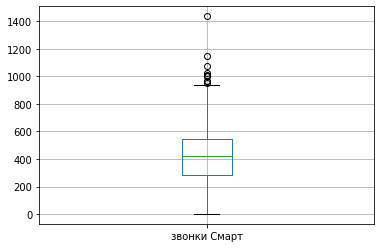

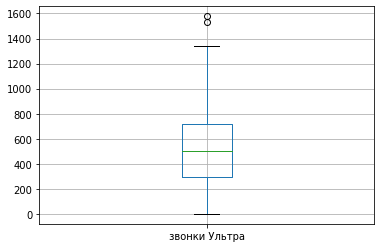

In [23]:
# выведем диаграммы размаха для двух наборов данных
# суммарная продолжительность звонков в месяц для клиентов тарифа Смарт
user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'calls_duration', kind = 'box', grid = 'True',\
                          label = 'звонки Смарт')

# и для клиентов тарифа Ультра
user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'calls_duration', kind = 'box', grid = 'True',\
                          label = 'звонки Ультра') 

plt.show() 

Длительность звонков Smart:
Дисперсия: 35702.05
count    2221.00
mean      419.44
std       188.99
min         2.00
25%       285.00
50%       423.00
75%       546.00
max      1435.00
Name: calls_duration, dtype: float64 

Длительность звонков Ultra:
Дисперсия: 83144.41
count     947.00
mean      517.01
std       288.50
min         0.10
25%       294.40
50%       498.95
75%       715.60
max      1578.06
Name: calls_duration, dtype: float64


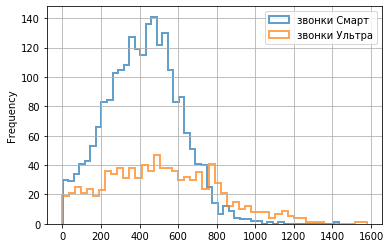

In [24]:
# выведем гистограммы и числовые характеристики распределения
ax = user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'calls_duration', kind = 'hist', grid = 'True', bins = 50,\
                          label = 'звонки Смарт',histtype = 'step', linewidth = 2, alpha = 0.7)

user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'calls_duration', kind = 'hist', grid = 'True', bins = 50,\
                          label = 'звонки Ультра',histtype = 'step', linewidth = 2, alpha = 0.7, ax = ax) 

print('Длительность звонков Smart:')
print('Дисперсия:', '{:.2f}'.format(np.var(user_monthly_overall.query('tariff == "smart"')['calls_duration'])))
print(user_monthly_overall.query('tariff == "smart"')['calls_duration'].describe().round(2),'\n')

print('Длительность звонков Ultra:')
print('Дисперсия:', '{:.2f}'.format(np.var(user_monthly_overall.query('tariff == "ultra"')['calls_duration'])))
print(user_monthly_overall.query('tariff == "ultra"')['calls_duration'].describe().round(2))

Характеристики распределения для длительности звонков каждый месяц:

клиенты с тарифом Смарт:
- средняя продолжительность: 419 мин.;
- дисперсия: 35702 мин^2;
- стандартное отклонение: 189 мин.

клиенты с тарифом Ультра:
- средняя продолжительность: 517 мин.;
- дисперсия: 83144 мин^2;
- стандартное отклонение: 288 мин.

### 3.2 Количество сообщений

Рассмотрим, как распределены количества сообщений.

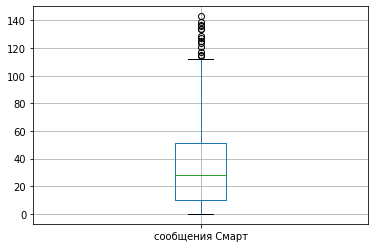

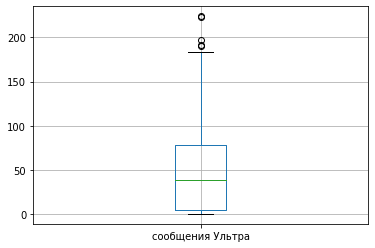

In [25]:
# выведем диаграммы размаха для двух наборов данных
# суммарное кол-во сообщений в месяц для клиентов тарифа Смарт
user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'number_of_messages', kind = 'box', grid = 'True',\
                          label = 'сообщения Смарт') 

# и для клиентов тарифа Ультра
user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'number_of_messages', kind = 'box', grid = 'True',\
                          label = 'сообщения Ультра')

plt.show() 

сообщения Smart:
Дисперсия: 798.85
count    2221.00
mean       33.39
std        28.27
min         0.00
25%        10.00
50%        28.00
75%        51.00
max       143.00
Name: number_of_messages, dtype: float64 

сообщения Ultra:
Дисперсия: 2169.43
count    947.00
mean      48.76
std       46.60
min        0.00
25%        5.00
50%       39.00
75%       78.50
max      224.00
Name: number_of_messages, dtype: float64


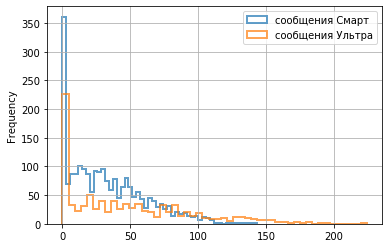

In [26]:
# выведем гистограммы и числовые характеристики распределения
ax = user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'number_of_messages', kind = 'hist', grid = 'True', bins = 50,\
                          label = 'сообщения Смарт',histtype = 'step', linewidth = 2, alpha = 0.7)

user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'number_of_messages', kind = 'hist', grid = 'True', bins = 50,\
                          label = 'сообщения Ультра',histtype = 'step', linewidth = 2, alpha = 0.7, ax = ax)

print('сообщения Smart:')
print('Дисперсия:', '{:.2f}'.format(np.var(user_monthly_overall.query('tariff == "smart"')['number_of_messages'])))
print(user_monthly_overall.query('tariff == "smart"')['number_of_messages'].describe().round(2),'\n')

print('сообщения Ultra:')
print('Дисперсия:', '{:.2f}'.format(np.var(user_monthly_overall.query('tariff == "ultra"')['number_of_messages'])))
print(user_monthly_overall.query('tariff == "ultra"')['number_of_messages'].describe().round(2))

Характеристики распределения для количества сообщений каждый месяц:

клиенты с тарифом Смарт:
- среднее количество: 33;
- дисперсия: 799;
- стандартное отклонение: 28.

клиенты с тарифом Ультра:
- среднее количество: 49;
- дисперсия: 2169;
- стандартное отклонение: 47.

### 3.3 Объём интернет-трафика

Рассмотрим, как распределен объём используемого интернет-трафика.

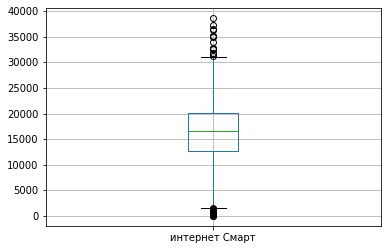

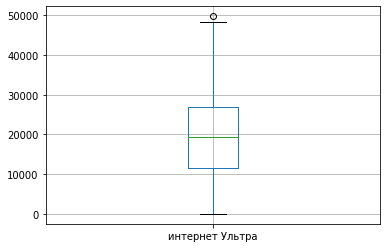

In [27]:
# выведем диаграммы размаха для двух наборов данных
# суммарный объём интернет-трафика в месяц для клиентов тарифа Смарт
user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'traffic', kind = 'box', grid = 'True',\
                          label = 'интернет Смарт')

# и для клиентов тарифа Ультра
user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'traffic', kind = 'box', grid = 'True',\
                          label = 'интернет Ультра') 

plt.show() 

интернет Smart:
Дисперсия: 34599364.85
count     2221.00
mean     16231.46
std       5883.45
min          0.00
25%      12672.00
50%      16527.00
75%      20068.00
max      38610.00
Name: traffic, dtype: float64 

интернет Ultra:
Дисперсия: 102465744.03
count      947.00
mean     19471.58
std      10127.89
min          0.00
25%      11623.24
50%      19315.85
75%      26838.07
max      49745.69
Name: traffic, dtype: float64


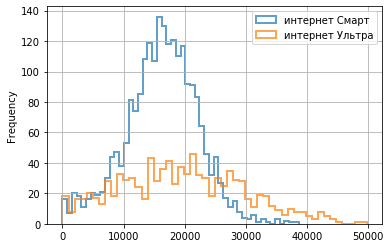

In [28]:
# выведем гистограммы и числовые характеристики распределения
ax = user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'traffic', kind = 'hist', grid = 'True', bins = 50,\
                          label = 'интернет Смарт',histtype = 'step', linewidth = 2, alpha = 0.7) 

user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'traffic', kind = 'hist', grid = 'True', bins = 50,\
                          label = 'интернет Ультра',histtype = 'step', linewidth = 2, alpha = 0.7, ax = ax) 

print('интернет Smart:')
print('Дисперсия:', '{:.2f}'.format(np.var(user_monthly_overall.query('tariff == "smart"')['traffic'])))
print(user_monthly_overall.query('tariff == "smart"')['traffic'].describe().round(2),'\n')

print('интернет Ultra:')
print('Дисперсия:', '{:.2f}'.format(np.var(user_monthly_overall.query('tariff == "ultra"')['traffic'])))
print(user_monthly_overall.query('tariff == "ultra"')['traffic'].describe().round(2))

Характеристики распределения для объёма интернет-трафика каждый месяц:

клиенты с тарифом Смарт:
- средний объём: 16230 МБ;
- дисперсия: 34599364 МБ^2;
- стандартное отклонение: 5.880 МБ.

клиенты с тарифом Ультра:
- средний объём: 19470 МБ;
- дисперсия: 102465744 МБ^2;
- стандартное отклонение: 10.130 МБ.

## 4. Проверка гипотез

### 4.1 Равенство средних значений выручки в месяц на разных тарифах

Рассмотрим распределение выручки в каждый месяц для клиентов разных тарифов.

выручка Smart:
Дисперсия: 621610.24
count    2221.00
mean     1234.47
std       788.60
min       550.00
25%       550.00
50%       961.09
75%      1670.51
max      6711.02
Name: revenue, dtype: float64 

выручка Ultra:
Дисперсия: 128545.92
count     947.00
mean     2061.29
std       358.72
min      1950.00
25%      1950.00
50%      1950.00
75%      1950.00
max      4736.97
Name: revenue, dtype: float64


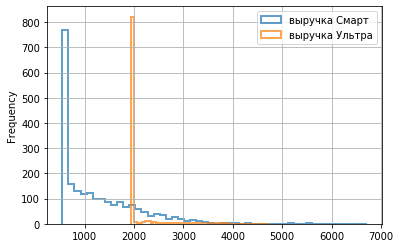

In [29]:
ax = user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'revenue', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'выручка Смарт',histtype = 'step', linewidth = 2, alpha = 0.7) 

user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'revenue', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'выручка Ультра',histtype = 'step', linewidth = 2, alpha = 0.7, ax = ax) 

print('выручка Smart:')
print('Дисперсия:', '{:.2f}'.format(np.var(user_monthly_overall.query('tariff == "smart"')['revenue'])))
print(user_monthly_overall.query('tariff == "smart"')['revenue'].describe().round(2),'\n')

print('выручка Ultra:')
print('Дисперсия:', '{:.2f}'.format(np.var(user_monthly_overall.query('tariff == "ultra"')['revenue'])))
print(user_monthly_overall.query('tariff == "ultra"')['revenue'].describe().round(2))

Видим 2 выраженных пика на гистограмме в области ежемесячной абонентской платы (550р для тарифа Смарт и 1950р для тарифа Ультра). Выборочные средние значения ежемесячной выручки при этом существенно различаются (1230р и 2060р).

---

Сформулируем нулевую гипотезу:
"Средняя выручка от пользователей тарифом Смарт и Ультра одинакова".

In [30]:
# зададим критический уровень статистической значимости в 5%
alpha = .05 

# по Т-критерию Стьюдента сравним средние значения двух наборов данных:
# значений выручки в месяц от пользователей двух тарифов
results = st.ttest_ind(
    user_monthly_overall.query('tariff == "smart"')['revenue'], 
    user_monthly_overall.query('tariff == "ultra"')['revenue'],
    equal_var = False)

# уровень значимости
print('p-значение:', results.pvalue)

p-значение: 1.2159950099653873e-289


Получили значение уровня значимости значительно меньше 5% (вероятность равенства средней выручки разных тарифов близка к 0%). Отвергаем нулевую гипотезу. Делаем вывод о том, что средняя выручка отличается.

### 4.2 Равенство средних значений выручки в месяц сверх абонентской платы на разных тарифах

Рассмотрим объём выручки, который клиенты разных тарифов платят сверх абонентской платы каждый месяц.

In [31]:
# вычислим выручку с каждого пользователя сверх абонентской платы
def excess_revenue_calc(row):
    tariff = row['tariff']
    revenue = row['revenue']
    excess_revenue = 0
    if tariff == 'smart':
        return(revenue - smart_rub_monthly_fee)
    else:
        return(revenue - ultra_rub_monthly_fee)     

In [32]:
# добавим выручку сверх абонентской платы в новый столбец
user_monthly_overall['excess_revenue'] = user_monthly_overall.apply(excess_revenue_calc, axis = 1)
user_monthly_overall.head(10)

city  number_of_calls  calls_duration tariff  \
user_id month                                                      
1000    5      Краснодар             17.0          150.06  ultra   
        6      Краснодар             28.0          158.90  ultra   
        7      Краснодар             41.0          318.80  ultra   
        8      Краснодар             42.0          389.87  ultra   
        9      Краснодар             46.0          440.14  ultra   
        10     Краснодар             44.0          328.45  ultra   
        11     Краснодар             37.0          319.04  ultra   
        12     Краснодар             38.0          312.98  ultra   
1001    11        Москва             45.0          430.00  smart   
        12        Москва             47.0          414.00  smart   

               number_of_messages   traffic     revenue  excess_revenue  
user_id month                                                            
1000    5                    22.0   2253.49  1950.00000         0.00000  
        6                    60.0  23233.77  1950.00000         0.00000  
        7                    75.0  14003.64  1950.00000         0.00000  
        8                    81.0  14055.93  1950.00000         0.00000  
        9                    57.0  14568.91  1950.00000         0.00000  
        10                   73.0  14702.49  1950.00000         0.00000  
        11                   58.0  14756.47  1950.00000         0.00000  
        12                   70.0   9817.61  1950.00000         0.00000  
1001    11                    0.0  18452.00  1153.90625       603.90625  
        12                    0.0  14053.00   550.00000         0.00000

сверх выручка Smart:
Дисперсия: 621610.24
count    2221.00
mean      684.47
std       788.60
min         0.00
25%         0.00
50%       411.09
75%      1120.51
max      6161.02
Name: excess_revenue, dtype: float64 

сверх выручка Ultra:
Дисперсия: 128545.92
count     947.00
mean      111.29
std       358.72
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      2786.97
Name: excess_revenue, dtype: float64


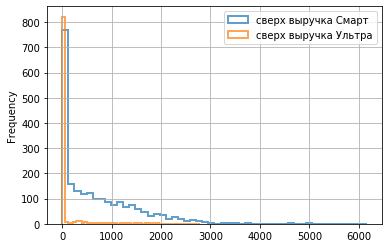

In [33]:
# рассмотрим распределение выручки в месяц (сверх абонентской платы) для клиентов разных тарифов
ax = user_monthly_overall.query('tariff == "smart"')\
                    .plot(y = 'excess_revenue', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'сверх выручка Смарт',histtype = 'step', linewidth = 2, alpha = 0.7) 

user_monthly_overall.query('tariff == "ultra"')\
                    .plot(y = 'excess_revenue', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'сверх выручка Ультра',histtype = 'step', linewidth = 2, alpha = 0.7, ax = ax) 

print('сверх выручка Smart:')
print('Дисперсия:', '{:.2f}'.format(np.var(user_monthly_overall.query('tariff == "smart"')['excess_revenue'])))
print(user_monthly_overall.query('tariff == "smart"')['excess_revenue'].describe().round(2),'\n')

print('сверх выручка Ultra:')
print('Дисперсия:', '{:.2f}'.format(np.var(user_monthly_overall.query('tariff == "ultra"')['excess_revenue'])))
print(user_monthly_overall.query('tariff == "ultra"')['excess_revenue'].describe().round(2))

Судя по гистограмме и числовым характеристикам, большое количество пользователей обоих тарифов не приносят выручки сверх абонентской платы. Выборочные средние значения ежемесячной выручки при этом различаются (684р и 111р).

---

Сформулируем нулевую гипотезу: "Средняя выручка в месяц сверх абонентской платы от пользователей тарифом Смарт и Ультра одинакова".

In [34]:
# зададим критический уровень статистической значимости в 5%
alpha = .05 

# по Т-критерию Стьюдента сравним средние значения двух наборов данных:
# значений выручки в месяц сверх абонентской платы от пользователей двух тарифов
results = st.ttest_ind(
    user_monthly_overall.query('tariff == "smart"')['excess_revenue'], 
    user_monthly_overall.query('tariff == "ultra"')['excess_revenue'],
    equal_var = False)

print('p-значение:', results.pvalue)

p-значение: 2.619486239930635e-155


Получили значение уровня значимости значительно меньше 5% (вероятность равенства средней выручки разных тарифов близка к 0%). Отвергаем нулевую гипотезу. Делаем вывод о том, что средняя выручка отличается.

### 4.3 Равенство средних значений выручки в Москве и регионах

Рассмотрим объём выручки, который клиенты из Москвы и регионов приносят каждый месяц.

выручка Москва:
Дисперсия: 546239.55
count     610.00
mean     1506.26
std       739.69
min       550.00
25%       733.20
50%      1689.82
75%      1950.00
max      5186.43
Name: revenue, dtype: float64 

выручка регионы:
Дисперсия: 634298.98
count    2558.00
mean     1475.75
std       796.58
min       550.00
25%       679.03
50%      1490.33
75%      1950.00
max      6711.02
Name: revenue, dtype: float64


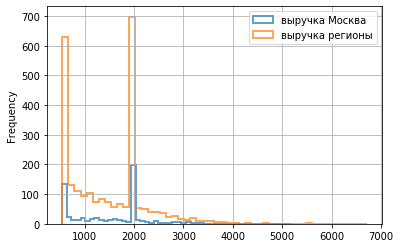

In [35]:
ax = user_monthly_overall.query('city == "Москва"')\
                    .plot(y = 'revenue', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'выручка Москва',histtype = 'step', linewidth = 2, alpha = 0.7) \
                          #xlim = (0,600), ylim = (0,250))

user_monthly_overall.query('city != "Москва"')\
                    .plot(y = 'revenue', kind = 'hist', grid = 'True', bins = 50, \
                          label = 'выручка регионы',histtype = 'step', linewidth = 2, alpha = 0.7, ax = ax) \
                          #xlim = (0,600), ylim = (0,250))
print('выручка Москва:')
print('Дисперсия:',  '{:.2f}'.format(np.var(user_monthly_overall.query('city == "Москва"')['revenue'])))
print(user_monthly_overall.query('city == "Москва"')['revenue'].describe().round(2),'\n')

print('выручка регионы:')
print('Дисперсия:',  '{:.2f}'.format(np.var(user_monthly_overall.query('city != "Москва"')['revenue'])))
print(user_monthly_overall.query('city != "Москва"')['revenue'].describe().round(2))

И для Москвы и для регионов видим 2 выраженных пика на гистограмме в области ежемесячной абонентской платы (550р для тарифа Смарт и 1950р для тарифа Ультра). Выборочные средние значения ежемесячной выручки близки (1506р и 1475р).

---

Сформулируем нулевую гипотезу: "Средняя выручка от пользователей из Москвы и из других регионов одинакова".

In [36]:
# зададим критический уровень статистической значимости в 5%
alpha = .05 

# по Т-критерию Стьюдента сравним средние значения двух наборов данных:
# значений выручки в месяц от пользователей Москвы и других городов
results = st.ttest_ind(
    user_monthly_overall.query('city == "Москва"')['revenue'], 
    user_monthly_overall.query('city != "Москва"')['revenue'])

print('p-значение:', results.pvalue)

p-значение: 0.38899332717001367


Уровень статистической значимости (38.9%) выше критического (5%), не можем отвергнуть нулевую гипотезу, делаем вывод о том, что средняя выручка клиентов из Москвы и из регионов не отличается.

## 5. Выводы

1. В результате анализа набора данных об активности клиентов оператора сотовой связи, получены средние значения выручки с пользователя за месяц. Для пользователей тарифа Смарт среднее значение выручки: 1234р, а для клиентов тарифа Ультра: 2061р. Проведя статистический анализ двух выборок, делаем вывод о том, что эти значения статистически различны, то есть не случайны.

2. Средние значение выручки в месяц сверх абонентской платы отличается для пользователей разных тарифов. В имеющемся наборе данных средняя сверх выручка в месяц для абонентов тарифа Смарт: 685р., а для абонентов тарифа Ультра: 111р.

3. Для пользователей из Москвы среднее значение выручки в месяц составляет 1506р, а для пользователей из регионов 1475р, в результате статистического анализа, обнаружено, что с вероятностью в 38.9% это отличие случайно, и среднее значение выручки одинаково для клиентов из Москвы и из регионов.